This dataset provides historical stock data from Google, featuring 14 columns and 1,257 rows. Each column represents a specific attribute, while each row holds the corresponding values for these attributes. The data is organized by date, covering Google stock performance from 2016 to 2021

# Importing Libraries

In [1]:
import math
import numpy as np
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
echo %USERNAME%


manik


# Preproccesing

In [6]:
data.isna().sum()

NameError: name 'data' is not defined

In [8]:
data.duplicated().sum()

NameError: name 'data' is not defined

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 127.9+ KB


In [88]:
print(data.columns)


Index(['date', 'close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')


In [92]:
if 'symbol' in data.columns:
    data.drop(columns=['symbol'], inplace=True)
else:
    print("Column 'symbol' not found. Skipping drop operation.")


Column 'symbol' not found. Skipping drop operation.


In [94]:
data['date'] = pd.to_datetime(data['date'], utc=True)
data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   date         1258 non-null   datetime64[ns, UTC]
 1   close        1258 non-null   float64            
 2   high         1258 non-null   float64            
 3   low          1258 non-null   float64            
 4   open         1258 non-null   float64            
 5   volume       1258 non-null   int64              
 6   adjClose     1258 non-null   float64            
 7   adjHigh      1258 non-null   float64            
 8   adjLow       1258 non-null   float64            
 9   adjOpen      1258 non-null   float64            
 10  adjVolume    1258 non-null   int64              
 11  divCash      1258 non-null   float64            
 12  splitFactor  1258 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(10), int64(2)
memory usage: 127.9 KB


In [98]:
data['date'] = data['date'].dt.strftime('%Y-%m-%d')
data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [100]:
data=data.sort_values(by="date")
data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


# train and test data

In [103]:
DF=data.copy()
DF['date'] = pd.to_datetime(DF['date'])
DF=DF.set_index("date")
DF

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [105]:
DF.drop(columns =['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'] , inplace=True)
DF

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


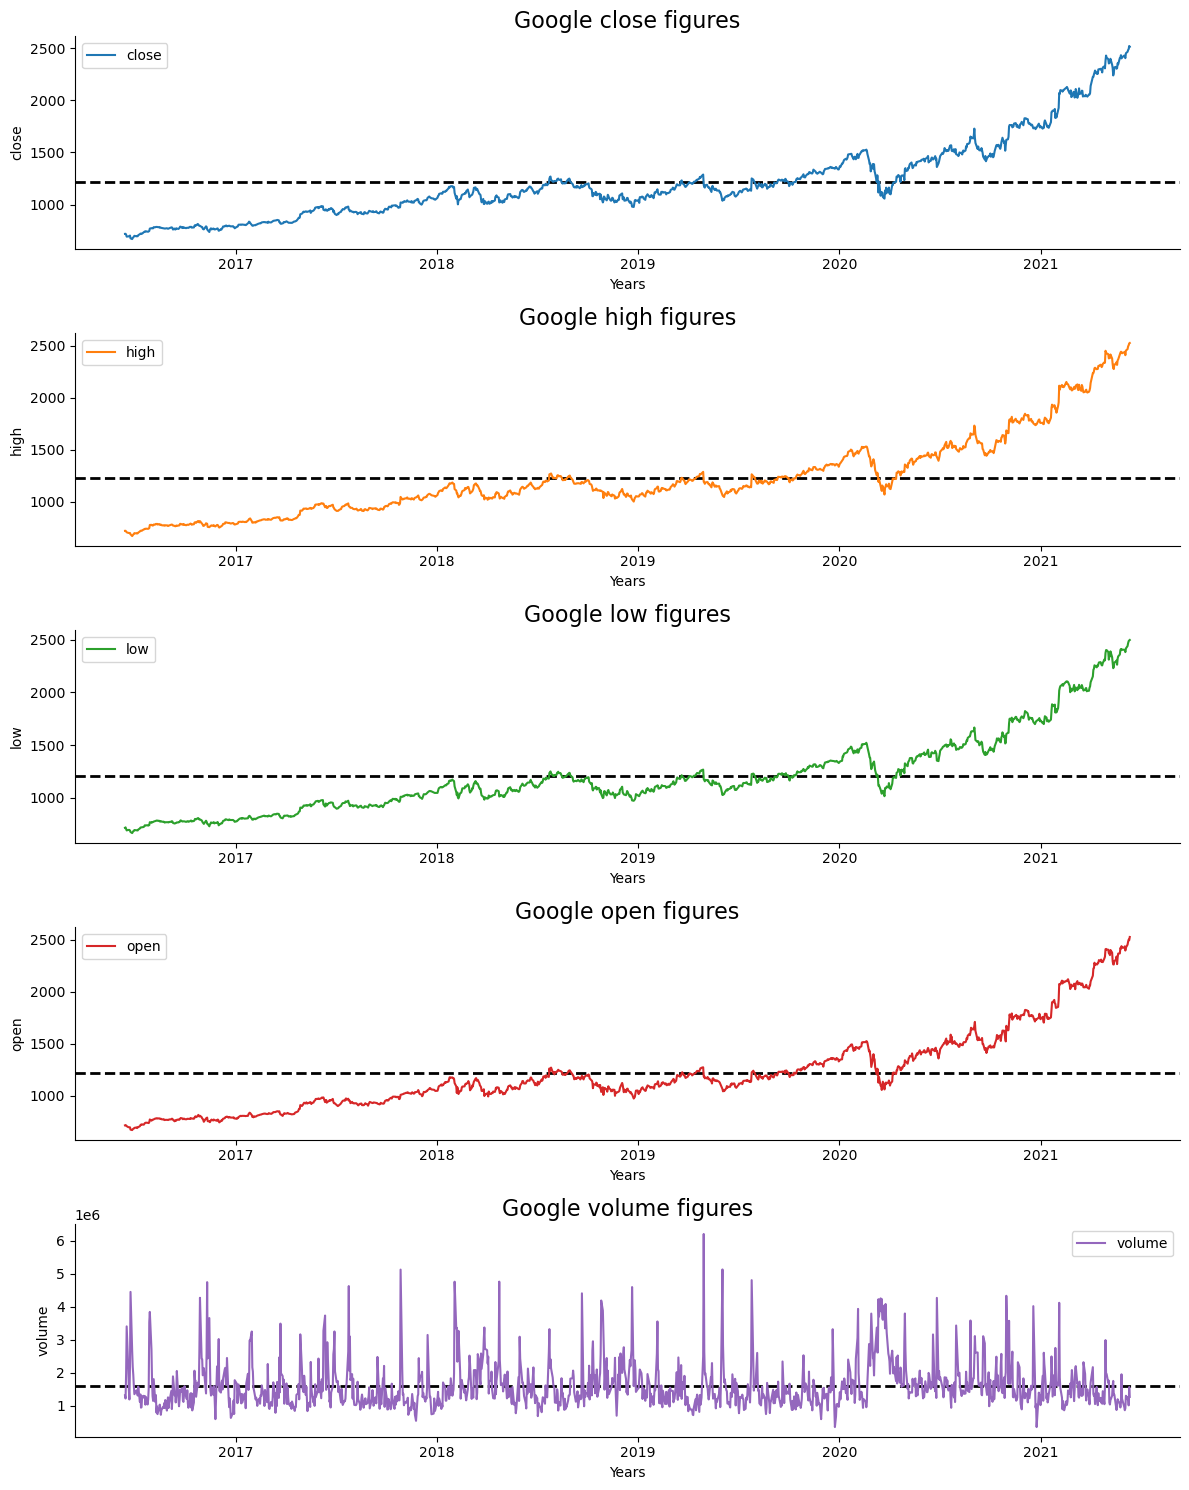

In [107]:
colors = plt.rcParams["axes.prop_cycle"]()
fig = plt.figure(figsize=(12,15),dpi=100)
for i in range(len(DF.columns)):
    color = next(colors)["color"]
    plt.subplot(5, 1, i+1)
    plt.plot(DF[DF.columns[i]], color = color)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.axhline(DF[DF.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    plt.title("Google "+ DF.columns[i] + " figures", fontsize=16)
    plt.xlabel('Years')
    plt.ylabel(DF.columns[i])
    plt.legend([DF.columns[i]])
    plt.tight_layout()
plt.show()

In [109]:
training_set = DF[:'2020'].iloc[:,0:1].values
test_set = DF['2020':].iloc[:,0:1].values

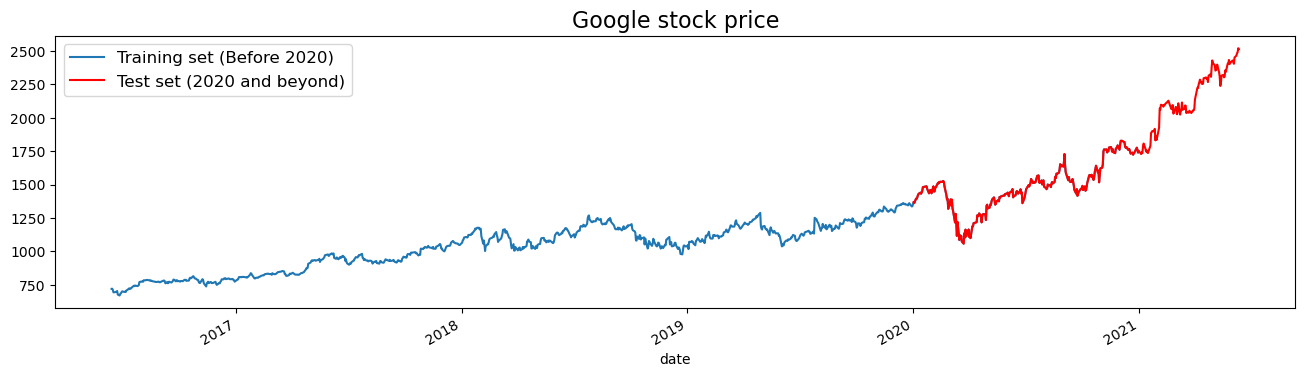

In [111]:
DF['close'][:'2020'].plot(figsize=(16,4),legend=True)
DF['close']['2020':].plot(figsize=(16,4),legend=True, color = 'r')
plt.legend(['Training set (Before 2020)','Test set (2020 and beyond)'], fontsize=12)
plt.title('Google stock price', fontsize=16)
plt.show()

In [113]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [115]:
timesteps = 60

In [117]:
X_train = []
y_train = []
for i in range(timesteps,1147):
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [119]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [121]:
dataset_total = pd.concat((DF['close'][:'2020'], DF['close']['2020':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [123]:
dataset_total

date
2016-06-14     718.27
2016-06-15     718.92
2016-06-16     710.36
2016-06-17     691.72
2016-06-20     693.71
               ...   
2021-06-07    2466.09
2021-06-08    2482.85
2021-06-09    2491.40
2021-06-10    2521.60
2021-06-11    2513.93
Name: close, Length: 1511, dtype: float64

In [125]:
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# LSTM Model

In [128]:
Model = Sequential()
Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1],1)))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(layers.LSTM(units = 100, return_sequences = False))
Model.add(layers.Dropout(rate = 0.2))
Model.add(layers.Dense(units = 25))
Model.add(layers.Dense(units = 1))
Model.add(Dense(units = 1))
Model.summary()

C:\Users\manik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 284,553 (1.09 MB)

 Trainable params: 284,553 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
Model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['accuracy'])

In [132]:
epochs = 15
batch_size = 32

In [134]:
history =  Model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 192ms/step - accuracy: 8.6388e-04 - loss: 0.0397
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 5.2569e-05 - loss: 0.0050
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - accuracy: 3.3189e-04 - loss: 0.0038
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - accuracy: 8.6388e-04 - loss: 0.0036
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 7.4058e-04 - loss: 0.0027
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 0.0014 - loss: 0.0034
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 4.4850e-04 - loss: 0.0030
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 5.2569e-05 - loss: 0.0029
Epoch 9/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 6.3225e-04 - loss: 0.0023
Epoch 10/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.0024 - loss: 0.0024
Epoch 11/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 5.8265e-04 - loss: 0.0018
Epoch 12/15


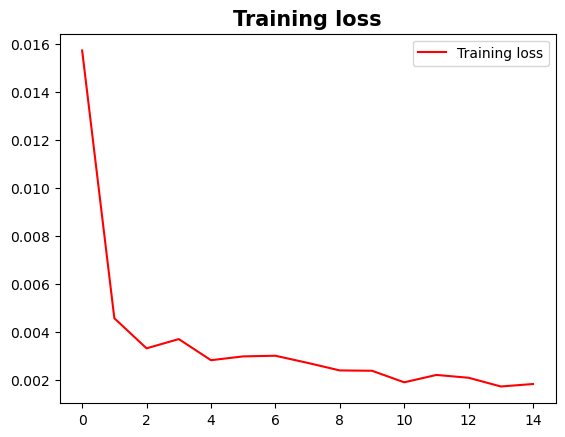

<Figure size 640x480 with 0 Axes>

In [135]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

# predictions

In [139]:
predicted_stock_price = Model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step


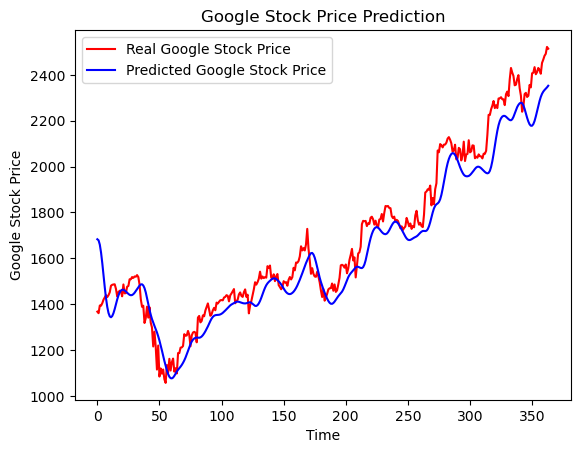

In [141]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Google Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()
plot_predictions(test_set, predicted_stock_price)

In [143]:
# Model with Hyperparameter Tuning
def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Choice('units', [50, 100, 150, 200]),
        return_sequences=True,
        input_shape=(X_train.shape[1], 1)
    ))
    model.add(Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3, 0.4, 0.5])))

    # Adding additional LSTM layers
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(LSTM(
            units=hp.Choice(f'units_{i}', [50, 100, 150, 200]),
            return_sequences=True if i < 2 else False
        ))
        model.add(Dropout(hp.Choice(f'dropout_rate_{i}', [0.1, 0.2, 0.3, 0.4, 0.5])))

    model.add(Dense(units=hp.Choice('dense_units', [10, 25, 50])))
    model.add(Dense(1))

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.0001, 0.0005, 0.001, 0.005])),
        loss='mean_squared_error'
    )

    return model

In [153]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [157]:
import keras_tuner as kt
print("KerasTuner installed successfully!")

KerasTuner installed successfully!


In [161]:
from tensorflow.keras.optimizers import Adam


In [163]:
from tensorflow.keras.optimizers import Adam  # Import Adam

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32)))
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.0001, 0.0005, 0.001, 0.005])),
        loss='mean_squared_error'
    )

    return model

In [165]:
# Hyperparameter tuning using KerasTuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=2,  # different hyperparameter combinations
    executions_per_trial=1,
    directory='hyper_tuning',
    project_name='lstm_stock_prediction'
)

C:\Users\manik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [167]:
# Running the tuner
tuner.search(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2)

# best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

Trial 2 Complete [00h 00m 19s]
val_loss: 0.004370077047497034

Best val_loss So Far: 0.0025992414448410273
Total elapsed time: 00h 00m 39s
Best Hyperparameters: {'units': 64, 'learning_rate': 0.005}


In [169]:
# Train best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict Stock Prices
predicted_stock_price = best_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Epoch 1/10


C:\Users\manik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - loss: 0.0639 - val_loss: 0.0149
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0040 - val_loss: 0.0066
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 6.3832e-04 - val_loss: 0.0035
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 6.1357e-04 - val_loss: 0.0032
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 5.6110e-04 - val_loss: 0.0030
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 6.5649e-04 - val_loss: 0.0032
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 6.5667e-04 - val_loss: 0.0029
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 6.8023e-04 - val_loss: 0.0034
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 5.8334e-04 - val_loss: 0.0028
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step


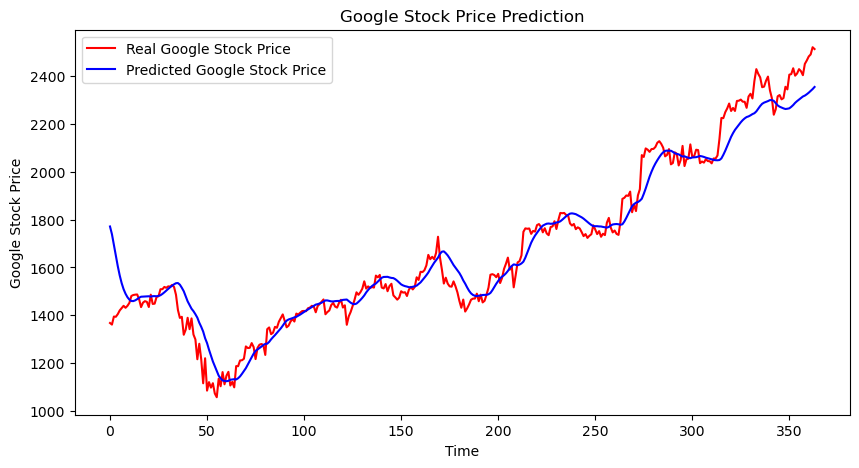

In [171]:
def plot_predictions(test, predicted):
    plt.figure(figsize=(10, 5))
    plt.plot(test, color='red', label='Real Google Stock Price')
    plt.plot(predicted, color='blue', label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

plot_predictions(test_set, predicted_stock_price)